In [18]:
from IPython.display import Image
import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## NGO Direct 광고대비 후원금액 예측
 - ###  미디어 지표인 SPOT와 Imps 대비 DRTV 후원금 모금 실적간의 상관관계 분석
 - ###  Data
     - ####  18년1월~20년11월까지 채널별 후원금 모금 실적
     - ####  18년1월~20년11월까지 채널별 세이브더칠드런 광고 송출횟수 및 누적광고시청자수

![title](ngo.png)

### 1. 데이터프레임 설명

  #### (1) 큐시트 : 광고방송 스케쥴

In [2]:
cue_sheet = pd.read_excel("./datas/Cuesheet.xlsx",'①큐시트')
cue_sheet.head(4)

,Station,Programme,Time,Daypart,Class,Secs,Kinds,Unit price,Bonus rate,Net price,Insertion,Ad value,Cost,Date,Film,연월
0,C채널,광림의시간,12:59:00,12시대,SA,60,SPOT,1400000.0,60.4,23178.807947,1,1400000.0,25496.688742,2020-05-31,JUST 신구,2005월
1,C채널,드림워십,14:59:00,14시대,SA,60,SPOT,1400000.0,60.4,23178.807947,1,1400000.0,25496.688742,2020-05-31,JUST 신구,2005월
2,C채널,새에덴강단,16:59:00,16시대,SA,60,SPOT,1400000.0,60.4,23178.807947,1,1400000.0,25496.688742,2020-05-31,JUST 신구,2005월
3,C채널,이영훈목사의 성령님과 함께,13:59:00,13시대,SA,60,SPOT,1400000.0,60.4,23178.807947,1,1400000.0,25496.688742,2020-05-31,JUST 신구,2005월


In [3]:
cue_sheet.tail(1)

,Station,Programme,Time,Daypart,Class,Secs,Kinds,Unit price,Bonus rate,Net price,Insertion,Ad value,Cost,Date,Film,연월
45331,EBS-2,2-2149-4,21:49,21시대,A,60,NaN,1080000.0,3.204,337078.651685,1,1080000.0,337078.651685,2020-12-31,JUST 신구,2012월


#### (2) 후원내역

In [4]:
donour = pd.read_excel("./datas/Donour.xlsx",'②후원내역')
donour.tail(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34840 entries, 0 to 34839
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     34840 non-null  datetime64[ns]
 1   Time     34840 non-null  object        
 2   Daypart  34840 non-null  object        
 3   Dnis     34840 non-null  object        
 4   Station  34840 non-null  object        
 5   I/B콜수    34840 non-null  int64         
 6   응대호      34840 non-null  int64         
 7   정기후원     34840 non-null  int64         
 8   후원금액     34840 non-null  int64         
 9   Film     32258 non-null  object        
 10  연월       34840 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 2.9+ MB


#### (3) 송출내역


In [6]:
rating_18_1 = pd.read_excel("./datas/Rating_18-1.xlsx",'③송출내역-18년-1')
rating_18_2 = pd.read_excel("./datas/Rating_18-2.xlsx",'③송출내역-18년-2')
rating_19 = pd.read_excel("./datas/Rating_19.xlsx",'③송출내역-19년')
rating_20 = pd.read_excel("./datas/Rating_20.xlsx",'③송출내역-20년')
rating = pd.concat([rating_18_1, rating_18_2, rating_19, rating_20], axis = 0).reset_index()
rating.head(4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48432 entries, 0 to 48431
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      48432 non-null  int64         
 1   Station    48432 non-null  object        
 2   Date       48432 non-null  datetime64[ns]
 3   Time       48432 non-null  object        
 4   Secs       48432 non-null  int64         
 5   Film       48432 non-null  object        
 6   Programme  48432 non-null  object        
 7   Genre      48337 non-null  object        
 8   Net Price  48432 non-null  float64       
 9   Cost       48432 non-null  float64       
 10  Audience   48432 non-null  float64       
 11  Salehouse  0 non-null      float64       
 12  promocode  0 non-null      float64       
 13  pib        48432 non-null  object        
 14  pip        47119 non-null  object        
 15  origin     0 non-null      float64       
 16  telno      0 non-null      float64      

### 2. 분석을 위한 컬럼들

#### (1) Features
- rating_20["Audience"] : 시청자수
- rating_20["SPOT"] : 광고송출횟수
- rating 18~20까지 Concat된 자료필요

#### (2) Label
- Donour["I/B콜수"] : 콜수
- Donour["정기후원"] : 정기후원건수
- Donour["후원금액"] : 후원금액

#### (3) Filter
- 채널
- 기간 : 월별, 요일별
- film(광고소재별)

In [ ]:
#features생성
#Net Price 수익 audience

In [14]:
df1 = rating[["Date","Net Price", "Audience", "SPOT"]]
df_features = df1.groupby("Date").sum().reset_index()
df_features.tail(4)

,Date,Net Price,Audience,SPOT
1074,2020-12-12,7.065465e+06,1.674320e+06,74
1075,2020-12-13,7.897055e+06,2.103632e+06,91
1076,2020-12-14,2.666667e+05,2.666667e+04,4
1077,2020-12-15,1.333333e+05,1.333333e+04,4


In [15]:
#label 생성
df2 = donour[["Date","I/B콜수", "응대호", "정기후원","후원금액"]]
df_targets = df2.groupby("Date").sum().reset_index()
df_targets.tail(4)

,Date,I/B콜수,응대호,정기후원,후원금액
1076,2020-12-17,43,39,13,290000
1077,2020-12-18,50,48,16,310000
1078,2020-12-19,97,92,33,730000
1079,2020-12-20,100,89,40,900000


In [17]:
# Features , Label Merge
datas_1 = pd.merge(df_features, df_targets, how='inner', on='Date')
datas_1

,Date,Net Price,Audience,SPOT,I/B콜수,응대호,정기후원,후원금액
0,2018-01-01,2.259887e+05,8.228300e+04,9,0,0,1,20000
1,2018-01-02,3.210825e+06,4.481416e+05,49,30,29,16,370000
2,2018-01-03,3.153477e+06,3.807346e+05,48,39,36,11,390000
3,2018-01-04,4.206834e+06,3.993495e+05,58,44,40,16,330000
4,2018-01-05,3.575503e+06,5.976845e+05,59,41,40,14,300000
...,...,...,...,...,...,...,...,...
1069,2020-12-11,5.060139e+06,9.572532e+05,70,49,46,16,300000
1070,2020-12-12,7.065465e+06,1.674320e+06,74,78,65,20,480000
1071,2020-12-13,7.897055e+06,2.103632e+06,91,108,97,31,650000
1072,2020-12-14,2.666667e+05,2.666667e+04,4,54,46,16,315000


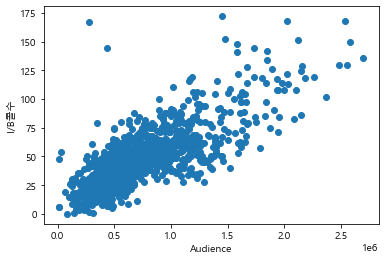

In [59]:
# Impression이 커질수록 I/B 콜이 커지는 경향성을 보임
x1 = datas_1["Audience"]
y1 = datas_1["I/B콜수"]
plt.scatter(x1, y1)
plt.xlabel("Audience")
plt.ylabel("I/B콜수")
plt.show()

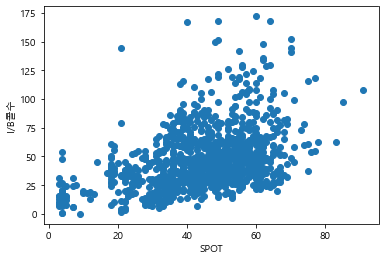

In [60]:
# SPOT의 경우 Impression 대비 I/B의 분포가 커지는 경향
x2 = datas_1["SPOT"]
plt.scatter(x2, y1)
plt.xlabel("SPOT")
plt.ylabel("I/B콜수")
plt.show()

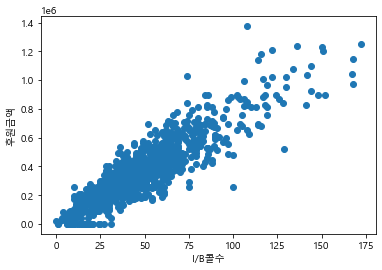

In [61]:
# 콜수가 많아지면 후원금액이 많아진다.
x3 = datas_1["I/B콜수"]
y3 = datas_1["후원금액"]
plt.scatter(x3, y3)
plt.xlabel("I/B콜수")
plt.ylabel("후원금액")
plt.show()

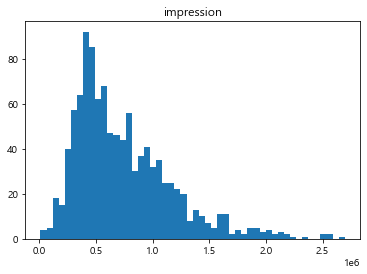

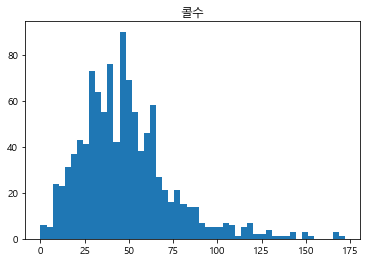

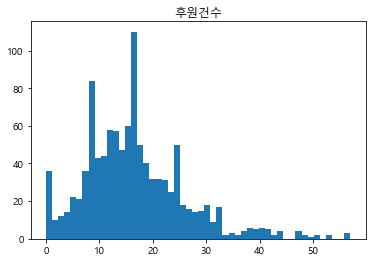

In [29]:
#각각의 분포 확인
#impression
plt.hist(x1,50)
plt.title('impression')
plt.show()

# 콜수
plt.hist(y1,50)
plt.title('콜수')
plt.show()

# 후원건수
plt.hist(y2,50)
plt.title('후원건수')
plt.show()

C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\edgar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

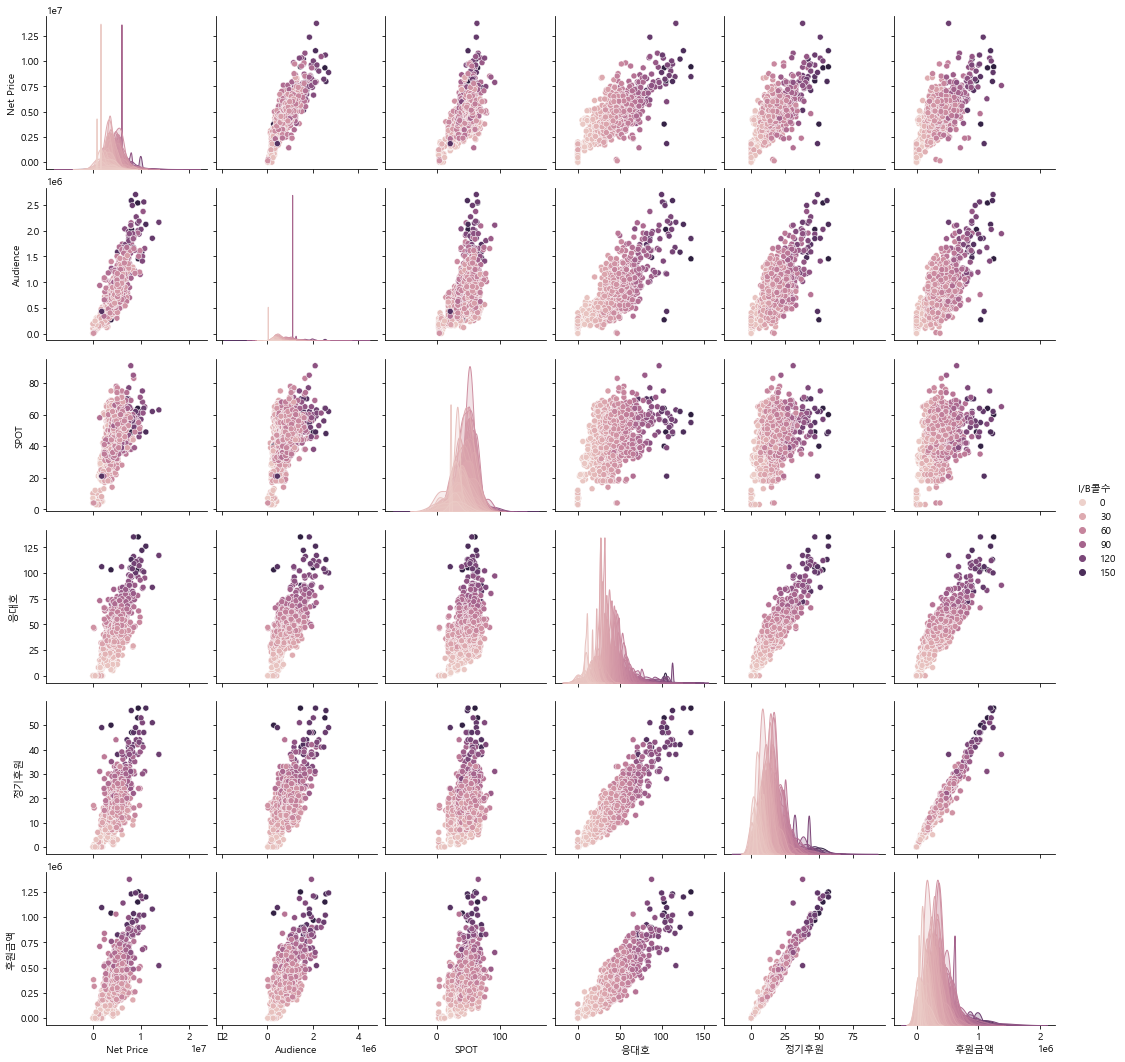

In [25]:
#간단한 I/B콜에 대한 pairplot
sns.pairplot(datas_1, hue="I/B콜수")
plt.show()

### Audience는 I/B콜수, 응대호, 정기후원, 후원금액 등의 label과의  상관계수 높으며 양의 상관관계를 가짐

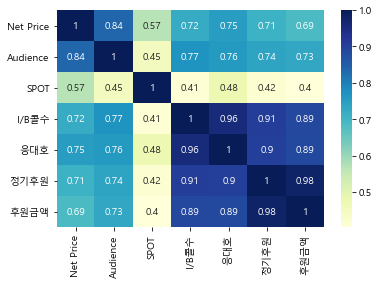

In [24]:
sns.heatmap(datas_1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [62]:
# lmplot regression

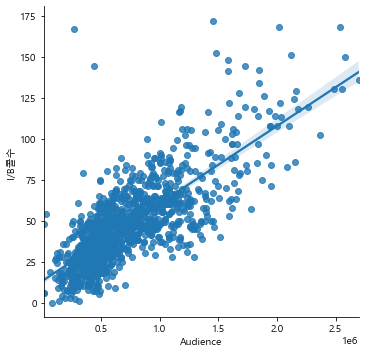

In [63]:
sns.lmplot(x='Audience', y='I/B콜수', data=datas_1)

In [33]:
import statsmodels.formula.api as smf
lm_model_1 = smf.ols(formula='y1~x1', data=datas_1).fit()
lm_model_1.params

Intercept    13.254018
x1            0.000047
dtype: float64

In [40]:
### 잔차평가
resid1 = lm_model_1.resid
resid1

0      -17.138743
1       -4.411573
2        7.770830
3       11.891990
4       -0.471754
          ...    
1069    -9.447625
1070   -14.301626
1071    -4.570163
1072    39.487002
1073    34.116492
Length: 1074, dtype: float64

## OLS Regression Results
 - 적당한 R_squared, 양호한 신뢰도

In [42]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=13)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  I/B콜수   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              6378.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        00:51:50   Log-Likelihood:                         -3220.5
No. Observations:                 751   AIC:                                      6443.
Df Residuals:                     750   BIC:                                      6448.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Audience    5.958e-05   7.46e-07     79.861      0.000    5.81e-05     6.1e-05
==============================================================================
Omnibus:                       75.858   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.214
Skew:                           0.329   Prob(JB):                     1.09e-75
Kurtosis:                       6.256   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Audience과 I/B콜수의 예측

In [48]:
predictions = lm.predict(X_test)
predictions

204    31.488383
337    36.683202
285    15.677024
747    55.608290
883    64.830934
         ...    
507    99.264513
261    17.677114
56     20.419968
256    28.733811
37     13.154684
Length: 323, dtype: float64

In [49]:
#Audience과 I/B콜수의 실제TEST
y_test

204    28
337    35
285    10
747    83
883    87
       ..
507    68
261    11
56     36
256     5
37     30
Name: I/B콜수, Length: 323, dtype: int64

In [66]:
### 참값의 직관적비교
sns.scatterplot(y_test, predictions);
plt.plot([0,175], [0,175], 'r', ls='dashed', lw=3);

Exception: Data must be 1-dimensional

In [54]:
#평가

In [55]:
from sklearn import metrics
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE 368.03890626762
RMSE 19.184340131149156


In [57]:
#Audience와 I/B콜수 재평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=13)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
reg =  LinearRegression()
reg.fit(X_train, y_train)



pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  16.19304927393786
RMSE of Test Data :  19.18818382370249


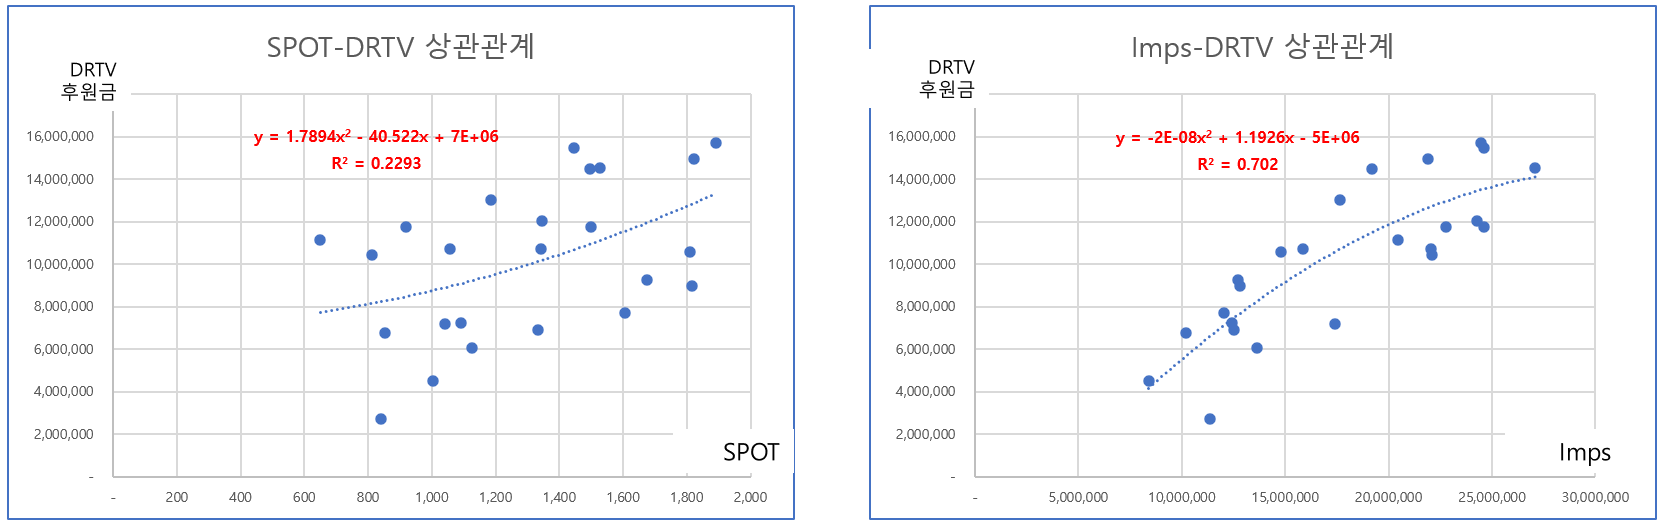

In [12]:
from IPython.display import Image
Image("ngo.png")